# Topics

## 1. Sound in Python -- "Jungle Sounds" Breakout
## 2. DFT and Power Spectrum -- Lecture Slides
## 3. DFT and Power Spectrum of synthesized sound signal  (Parseval's Theorem! -- Can use this as a doctest that checks this equality when calculating power spectrum)


In [2]:
'''Breakout solution

Jungle Sounds 

If one hears what sounds like noise: very likely it's sound saturation: sound level exceeds 2^16-1;
a very likely scenario for the combined sound.

For different sampling rates, I bring all sampling rates to the lowest one.

'''
import numpy as np
from scipy.io.wavfile import read


def reformat_sound(play_rate, duration, sound_rate, sound):    
    '''
    This function brings all (higher) sampling rates down to play_rate.
    
    It also turns stereo channels into mono-channel.
    
    '''
    if sound_rate < play_rate:
        raise Exception("Sample rate is lower than requird play rate.")        
    sound_dur = len(sound)/sound_rate
    if sound_dur < duration:
        raise Exception("Sound doesn't have a long enough duration.")

    # make it mono-channel and with integer-second length
    if len(sound.shape) > 1:
        sound = sound[:(len(sound)/rate_kookab) * rate_kookab, 0]
        
    if sound_rate > play_rate:
        sound_dtype = sound.dtype
        binsize = sound_rate/play_rate
        sound = sound.reshape(len(sound)/binsize, binsize).mean(axis = 1).astype(sound_dtype)

    return sound[:duration*play_rate]


def playsound(rate, sndarr):
    from scipy.io.wavfile import write
    import os
    write('tmp.wav', rate, sndarr)
    os.system("afplay tmp.wav") 
    os.system("rm tmp.wav") 
    return

rate_lion, lion = read("lion_roar.wav")
rate_peacock, peacock = read("PeacockCall.wav")
rate_zebra, zebra = read("Zebra.wav")
rate_kookab, kookab = read("Laughing_kookaburra_birds.wav")

print 'lion', rate_lion, len(lion)/rate_lion
print 'peacock', rate_peacock, len(peacock)/rate_peacock
print 'zebra', rate_zebra, len(zebra)/rate_zebra
print 'kookab', rate_kookab, len(kookab)/rate_kookab

play_rate = min([rate_lion, rate_peacock, rate_zebra, rate_kookab])
duration = 6

kookab = reformat_sound(play_rate, duration, rate_kookab, kookab)
peacock = reformat_sound(play_rate, duration, rate_peacock, peacock)
zebra = reformat_sound(play_rate, duration, rate_zebra, zebra)
lion = reformat_sound(play_rate, duration, rate_lion, lion)


# peacock getting closer -- inverse square law!
start_level = 1000
snd_level = np.linspace(start_level, len(peacock) + start_level, len(peacock))**2
snd_level /= snd_level.max()
peacock = np.int16(peacock * snd_level)

comb_snd = lion/6 + zebra/6 + kookab/6 + peacock/4
# Note: comb_snd = lion/4 + zebra/4 + kookab/4 + peacock/4
# is very different from comb_snd = (lion + zebra + kookab + peacock)/4
# Doing it the second way may very likely exceed the limit of 65535, then you lose the sigal!

playsound(play_rate, comb_snd)

IOError: [Errno 2] No such file or directory: 'lion_roar.wav'

In [3]:
'''Complex numbers in numpy'''

import numpy as np
a = 1 + 2j
b = np.conj(a)
c = np.conj(b)
print b.conj()
print c.conj()
print b*b.conj()

(1+2j)
(1-2j)
(5+0j)


## In what follows:
## tone_data: y_k
## ft = np.fft(tone_data): Y_n

In [3]:
%matplotlib inline
'''

fftfreg

from http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html

numpy.fft.fftfreq(n, d=1.0)[source]
Return the Discrete Fourier Transform sample frequencies.

The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length n and a sample spacing d:

f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd


Parameters:
n : int
Window length.
d : scalar, optional
Sample spacing (inverse of the sampling rate). Defaults to 1.
Returns:
f : ndarray
Array of length n containing the sample frequencies.



PAY ATTENTION TO THE MAXIMUM FREQUENCEY (NYQUIST FREQUENCY): 
IT IS *NOT* 1/sample_rate, BUT (1/2)(1/sample_rate)!!


'''


import matplotlib.pyplot as plt
import numpy as np

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**15
tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts))

if len(tone_data)%2:
    print "WARNING: length of data is NOT even."
    print'\a'


playsound(sample_rate, tone_data)

tone_data = np.float64(tone_data)

ft = np.fft.fft(tone_data)

freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)

#This shows the zero-freq term is the average, and is therefore always real for real data
print 'Zero freqeuncy and zero frequence term', freq[0], ft[0]
print 'Mean of signal', tone_data.mean()

# Nyquist Frequency
print 'Maximum frequency', np.abs(freq).max()
print 'Nyquist frequency', ft[len(tone_data)/2]
print 'Nyquist term (note its reality)', freq[len(tone_data)/2]
print 'Freq before and after the Nyquist frequency', freq[len(tone_data)/2-1], freq[len(tone_data)/2+1]
print "Terms before and after the Nyquist term (note they're cc of each other, but not perfectly so)", \
      ft[len(tone_data)/2-1], ft[len(tone_data)/2+1]


# numpy documentation is wrong:
print "N:", len(tone_data)
print "Number of postive frequency terms (expect N/2):", np.sum(freq > 0)
print "Number of negative frequency terms (expect N/2 - 1):", np.sum(freq < 0)


Zero freqeuncy and zero frequence term 0.0 0j
Mean of signal 0.0
Maximum frequency 22050.0
Nyquist frequency (-920+3.64366314898e-11j)
Nyquist term (note its reality) -22050.0
Freq before and after the Nyquist frequency 22049.5 -22049.5
Terms before and after the Nyquist term (note they're cc of each other, but not perfectly so) (-1025.2850533+0.0365195917886j) (-1025.2850533-0.0365195917345j)
N: 88200
Number of postive frequency terms (expect N/2): 44099
Number of negative frequency terms (expect N/2 - 1): 44100


## A[0] contains the zero-frequency term (the mean of the signal), which is always purely real for real inputs. Then A[1:n/2-1] contains the positive-frequency terms, and A[n/2:] contains the negative-frequency terms,  in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input.

Modified from: http://docs.scipy.org/doc/numpy/reference/routines.fft.html


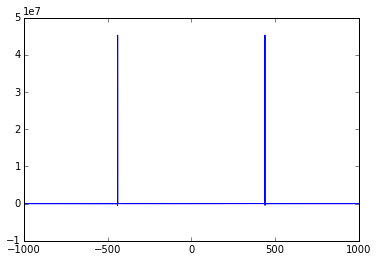

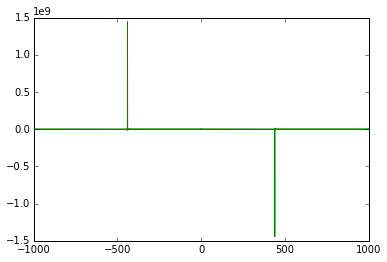

In [4]:
'''
Real part is not exactly zero due to numerical inaccuracy 
-- it can be reduced by increasing sampling rate; try sample_rate = 1048576. in the above cell.

''' 

# illustrate how freq is arranged before argsort, and explain the purpose of np.argsort()
# idx = np.argsort(freq)
# sp = sp[idx]
# freq = freq[idx]


plt.figure()
plt.plot(freq, ft.real, 'b-')
#plt.xlim([420, 460])
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
#plt.xlim([420, 460])
plt.xlim([-1000, 1000])
plt.show()


## Why are there a negative frequency and a positive frequency?

## It's simply Euler's Forumla:
## sin(2πft) = [exp(2iπft) - exp(-2iπft)]/2i

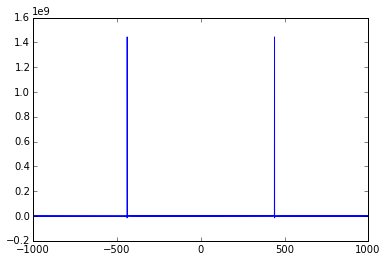

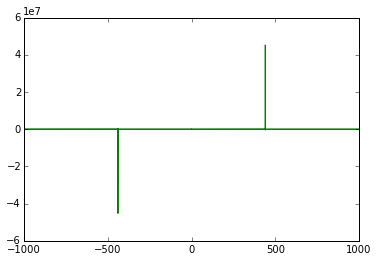

In [5]:
%matplotlib inline
'''

Before you run this -- what do you expect to get?

Here the imaginary part is not exactly zero due to numerical inaccuracy 
-- it can be reduced by increasing sampling rate; try sample_rate = 1048576.  (2^20)

'''

import matplotlib.pyplot as plt

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**15
tone_data = np.int16(amp*np.cos(np.pi*2*f*time_pts))

playsound(sample_rate, tone_data)


ft = np.fft.fft(tone_data)

freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)

plt.figure()
plt.plot(freq, ft.real, 'b-')
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
plt.xlim([-1000, 1000])
plt.show()



N = 88200
Power spectrum summed (536843840.154+0j)
Sum of data squared divided by N: 153
Sum of data squared divided by N: 5.36844e+08


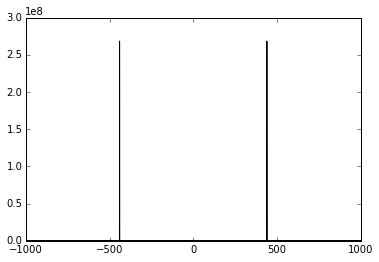

In [6]:
%matplotlib inline
'''

Parseval's Theorem and Conservation of Energy.

'''

import matplotlib.pyplot as plt

sample_rate = 44100.

duration = 2.


f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)

amp = 2**15
tone_data = np.int16(amp*np.sin(np.pi*2*f*time_pts))

playsound(sample_rate, tone_data)


ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)


# Power spectrum
# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is (|ft|/N)^2
N = len(tone_data)
print 'N =', N
pwr = (ft * ft.conj())/N**2

if pwr.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, pwr.real, 'k-')
plt.xlim([-1000, 1000])


print "Power spectrum summed", pwr.sum()
print 'Sum of data squared divided by N: {:g}'.format((tone_data**2).sum()/N)
print 'Sum of data squared divided by N: {:g}'.format((tone_data.astype(np.float)**2).sum()/N)



In [7]:
'''
Largest int16

'''

import numpy as np

#2^16 - 1
a = np.int16(65535)
b = np.int16(a + 2)
print 'largest int16:', a
print '(largest int16) + 1:', b

largest int16: -1
(largest int16) + 1: 1


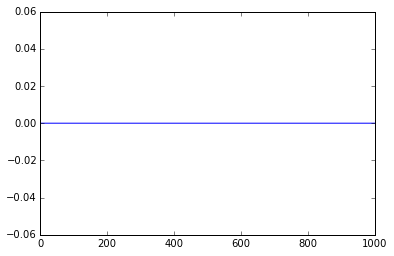

len(Pxx_den) 44101
Power spectral density integrated: 0


In [8]:
'''

Scipy's ready-made way of computing the (one-sided) power spectral density.

'''


from scipy import signal
f, Pxx_den = signal.periodogram(tone_data, sample_rate)
df = 1./duration
plt.figure()
plt.plot(f, Pxx_den)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print 'len(Pxx_den)', len(Pxx_den)
# sum of Pxx_den * df
print 'Power spectral density integrated: {:g}'.format((Pxx_den*df).sum())

plt.show()

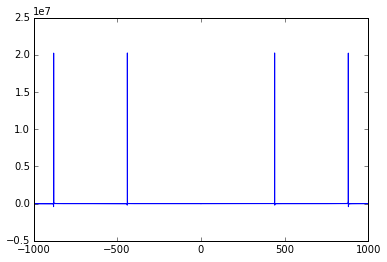

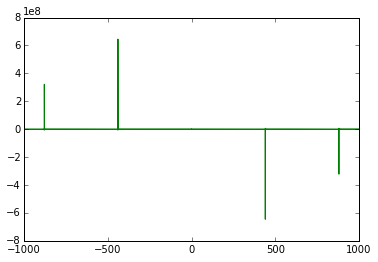

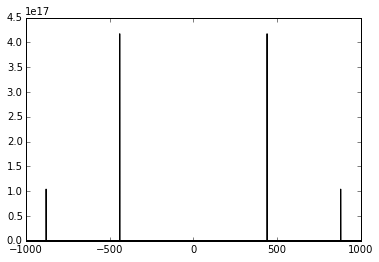

N = 88200
Power spectrum summed:1.34196e+08
Sum of data squared divided by N:1.34196e+08


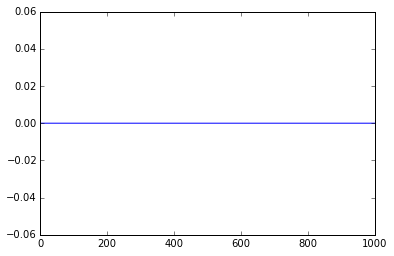

len(Pxx_den) 44101
Power spectral density integrated: 0


In [9]:
%matplotlib inline
'''

Two-frequency signal

'''

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

sample_rate = 44100.
#The following sample_rate is much better in showing the fft should be purely imaginary.
#sample_rate = 1048576.

duration = 2.
amp = 2**14

f = 440.
time_pts = np.linspace(0, duration, duration*sample_rate)


tone_data1 = np.int16(amp*np.sin(np.pi*2*f*time_pts))



f = 440.*2
time_pts = np.linspace(0, duration, duration*sample_rate)
tone_data2 = np.int16(amp*np.sin(np.pi*2*f*time_pts))

#tone_data =  np.int16( tone_data1*(1/np.sqrt(2)) + tone_data2*(1/np.sqrt(2)) )
tone_data =  np.int16( tone_data1*(2/np.sqrt(5)) + tone_data2*(1/np.sqrt(5)) )


playsound(sample_rate, tone_data)


ft = np.fft.fft(tone_data)
freq = np.fft.fftfreq(tone_data.shape[0], d = 1/sample_rate)


plt.figure()
plt.plot(freq, ft.real, 'b-')
plt.xlim([-1000, 1000])
plt.figure()
plt.plot(freq, ft.imag, 'g-')
plt.xlim([-1000, 1000])
plt.show()


ft_sq = ft * ft.conj()
if ft_sq.imag.max() > 1e-15:
    raise KeyboardInterrupt('Power is not real...something is wrong!!')

plt.figure()
plt.plot(freq, ft_sq.real, 'k-')
plt.xlim([-1000, 1000])
plt.show()

# checking Persarvel's Theorem
# B/c of the way np.fft is defined, the power spectrum is |ft|^2/N^2
N = len(tone_data)
print 'N =', N
pwr = ft_sq.real.sum()/N**2
print "Power spectrum summed:{:g}".format(pwr.real)
print 'Sum of data squared divided by N:{:g}'.format((tone_data.astype(np.float)**2).sum()/N)



f, Pxx_den = signal.periodogram(tone_data, sample_rate)
df = 1./duration
plt.figure()
plt.plot(f, Pxx_den)
plt.xlim([0, 1000])
plt.show()
# This should be N/2 + 1 (b/c of the zero-frequency term)
print 'len(Pxx_den)', len(Pxx_den)
# sum of Pxx_den * df
print 'Power spectral density integrated: {:g}'.format((Pxx_den*df).sum())

plt.show()


## Breakout: write functions get_tone() and plot_fourier().

## gen_tone(f, duration, sample_rate = 44100, amp = 2**13, play_sound = False) returns the numpy array for a tone.

## plot_fourier(sample_rate, signal, freq_lim = 1000.) plots the real and imaginary parts of the signal, and returns ft and freq.

In [10]:
f = 440.
sample_rate = 44100
tone1 = gen_tone(f, 2.)
tone2 = gen_tone(f*2, 2.)
tone = tone1/np.sqrt(2.) + tone2/np.sqrt(2.)
playsound(sample_rate, tone)
ft, freq = plot_fourier(sample_rate, tone)



NameError: name 'gen_tone' is not defined

## End of week 9-2